# Regime Detection

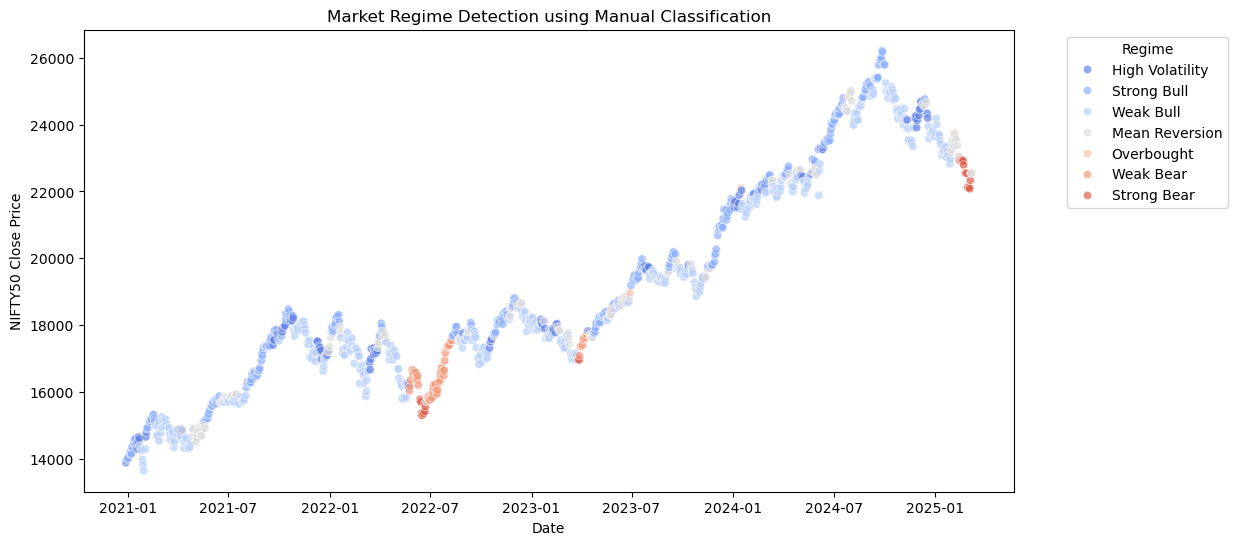

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta

# Load NIFTY50 data (Replace with actual data file)
df = pd.read_csv("NIFTY50_1d_5y.csv", parse_dates=["Date"], index_col="Date")

# Compute Indicators using pandas_ta directly
df["50EMA"] = ta.ema(df["Close"], length=50)
df["200EMA"] = ta.ema(df["Close"], length=200)
df["RSI"] = ta.rsi(df["Close"], length=14)
df["ATR"] = ta.atr(df["High"], df["Low"], df["Close"], length=14)
macd = ta.macd(df["Close"], fast=12, slow=26, signal=9)
df["MACD"] = macd["MACD_12_26_9"]
df["Signal"] = macd["MACDs_12_26_9"]
bbands = ta.bbands(df["Close"], length=20)
df["BB_Upper"] = bbands["BBU_20_2.0"]
df["BB_Middle"] = bbands["BBM_20_2.0"]
df["BB_Lower"] = bbands["BBL_20_2.0"]

def detect_regime(row, atr_rolling_mean):
    """Classifies the market into different regimes based on conditions."""
    if row["50EMA"] > row["200EMA"] and row["MACD"] > row["Signal"] and row["RSI"] > 60:
        return "Strong Bull"
    elif row["50EMA"] > row["200EMA"] and row["MACD"] < row["Signal"] and row["RSI"] < 60:
        return "Weak Bull"
    elif row["50EMA"] < row["200EMA"] and row["MACD"] < row["Signal"] and row["RSI"] < 40:
        return "Strong Bear"
    elif row["50EMA"] < row["200EMA"] and row["MACD"] > row["Signal"] and row["RSI"] > 40:
        return "Weak Bear"
    elif row["Close"] > row["BB_Upper"]:
        return "Overbought"
    elif row["Close"] < row["BB_Lower"]:
        return "Oversold"
    elif row["ATR"] > atr_rolling_mean:
        return "High Volatility"
    else:
        return "Mean Reversion"

# Calculate rolling mean for ATR
atr_rolling_mean = df["ATR"].rolling(50).mean()

# Apply Regime Classification
df.dropna(inplace=True)
df["Regime"] = df.apply(lambda row: detect_regime(row, atr_rolling_mean[row.name]), axis=1)

# Visualization
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x=df.index, y="Close", hue="Regime", palette="coolwarm", alpha=0.7)
plt.title("Market Regime Detection using Manual Classification")
plt.xlabel("Date")
plt.ylabel("NIFTY50 Close Price")
plt.legend(title="Regime", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Extensive regime detection

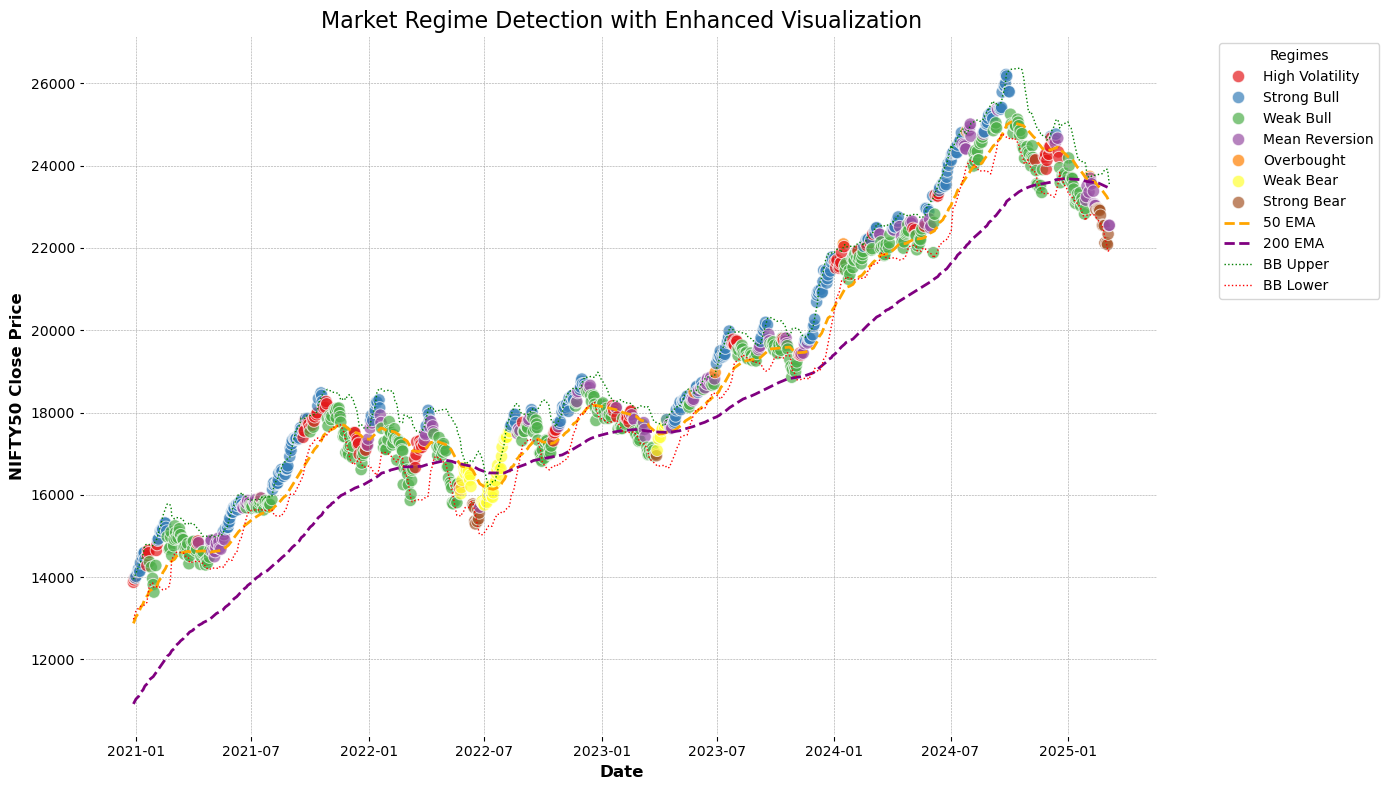

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta

# Load NIFTY50 data (Replace with actual data file)
df = pd.read_csv("NIFTY50_1d_5y.csv", parse_dates=["Date"], index_col="Date")

# Compute Indicators using pandas_ta directly
df["50EMA"] = ta.ema(df["Close"], length=50)
df["200EMA"] = ta.ema(df["Close"], length=200)
df["RSI"] = ta.rsi(df["Close"], length=14)
df["ATR"] = ta.atr(df["High"], df["Low"], df["Close"], length=14)
macd = ta.macd(df["Close"], fast=12, slow=26, signal=9)
df["MACD"] = macd["MACD_12_26_9"]
df["Signal"] = macd["MACDs_12_26_9"]
bbands = ta.bbands(df["Close"], length=20)
df["BB_Upper"] = bbands["BBU_20_2.0"]
df["BB_Middle"] = bbands["BBM_20_2.0"]
df["BB_Lower"] = bbands["BBL_20_2.0"]

def detect_regime(row, atr_rolling_mean):
    """Classifies the market into different regimes based on conditions."""
    if row["50EMA"] > row["200EMA"] and row["MACD"] > row["Signal"] and row["RSI"] > 60:
        return "Strong Bull"
    elif row["50EMA"] > row["200EMA"] and row["MACD"] < row["Signal"] and row["RSI"] < 60:
        return "Weak Bull"
    elif row["50EMA"] < row["200EMA"] and row["MACD"] < row["Signal"] and row["RSI"] < 40:
        return "Strong Bear"
    elif row["50EMA"] < row["200EMA"] and row["MACD"] > row["Signal"] and row["RSI"] > 40:
        return "Weak Bear"
    elif row["Close"] > row["BB_Upper"]:
        return "Overbought"
    elif row["Close"] < row["BB_Lower"]:
        return "Oversold"
    elif row["ATR"] > atr_rolling_mean:
        return "High Volatility"
    else:
        return "Mean Reversion"

# Calculate rolling mean for ATR
atr_rolling_mean = df["ATR"].rolling(50).mean()

# Apply Regime Classification
df.dropna(inplace=True)
df["Regime"] = df.apply(lambda row: detect_regime(row, atr_rolling_mean[row.name]), axis=1)

# Visualization
plt.figure(figsize=(14, 8))

# Scatterplot with color distinction for regimes
sns.scatterplot(data=df, x=df.index, y="Close", hue="Regime", palette="Set1", alpha=0.7, s=80)

# Plotting Moving Averages
plt.plot(df.index, df["50EMA"], label="50 EMA", color="orange", linewidth=2, linestyle='--')
plt.plot(df.index, df["200EMA"], label="200 EMA", color="purple", linewidth=2, linestyle='--')

# Plotting Bollinger Bands
plt.plot(df.index, df["BB_Upper"], label="BB Upper", color="green", linestyle=':', linewidth=1)
plt.plot(df.index, df["BB_Lower"], label="BB Lower", color="red", linestyle=':', linewidth=1)

# Adding titles, labels, and legend
plt.title("Market Regime Detection with Enhanced Visualization", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("NIFTY50 Close Price", fontsize=12)
plt.legend(title="Regimes", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


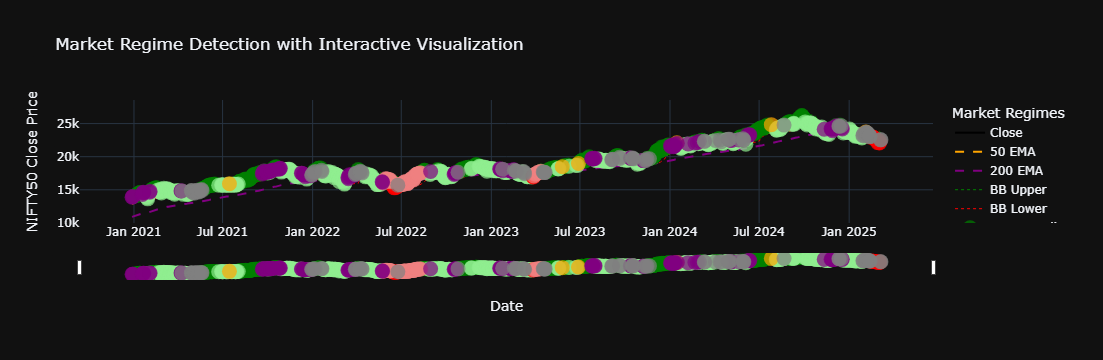

In [3]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go

# Load NIFTY50 data (Replace with actual data file)
df = pd.read_csv("NIFTY50_1d_5y.csv", parse_dates=["Date"], index_col="Date")

# Compute Indicators using pandas_ta directly
df["50EMA"] = ta.ema(df["Close"], length=50)
df["200EMA"] = ta.ema(df["Close"], length=200)
df["RSI"] = ta.rsi(df["Close"], length=14)
df["ATR"] = ta.atr(df["High"], df["Low"], df["Close"], length=14)
macd = ta.macd(df["Close"], fast=12, slow=26, signal=9)
df["MACD"] = macd["MACD_12_26_9"]
df["Signal"] = macd["MACDs_12_26_9"]
bbands = ta.bbands(df["Close"], length=20)
df["BB_Upper"] = bbands["BBU_20_2.0"]
df["BB_Middle"] = bbands["BBM_20_2.0"]
df["BB_Lower"] = bbands["BBL_20_2.0"]

# Define market regime detection function with concrete Mean Reversion logic
def detect_regime(row, atr_rolling_mean):
    """Classifies the market into different regimes based on conditions."""
    if row["50EMA"] > row["200EMA"] and row["MACD"] > row["Signal"] and row["RSI"] > 60:
        return "Strong Bull"
    elif row["50EMA"] > row["200EMA"] and row["MACD"] < row["Signal"] and row["RSI"] < 60:
        return "Weak Bull"
    elif row["50EMA"] < row["200EMA"] and row["MACD"] < row["Signal"] and row["RSI"] < 40:
        return "Strong Bear"
    elif row["50EMA"] < row["200EMA"] and row["MACD"] > row["Signal"] and row["RSI"] > 40:
        return "Weak Bear"
    elif row["Close"] > row["BB_Upper"]:
        return "Overbought"
    elif row["Close"] < row["BB_Lower"]:
        return "Oversold"
    elif row["ATR"] > atr_rolling_mean:
        return "High Volatility"
    elif row["BB_Lower"] < row["Close"] < row["BB_Upper"] and row["ATR"] < atr_rolling_mean and 40 <= row["RSI"] <= 60:
        return "Mean Reversion"
    else:
        return "Unclassified"  # Just in case there's an undefined scenario

# Calculate rolling mean for ATR
atr_rolling_mean = df["ATR"].rolling(50).mean()

# Apply Regime Classification
df.dropna(inplace=True)
df["Regime"] = df.apply(lambda row: detect_regime(row, atr_rolling_mean[row.name]), axis=1)

# Create the interactive chart using Plotly
fig = go.Figure()

# Add Close Price as a line trace
fig.add_trace(go.Scatter(x=df.index, y=df["Close"], mode="lines", name="Close", line=dict(color='black', width=2)))

# Add 50EMA as a line trace
fig.add_trace(go.Scatter(x=df.index, y=df["50EMA"], mode="lines", name="50 EMA", line=dict(color='orange', dash='dash', width=2)))

# Add 200EMA as a line trace
fig.add_trace(go.Scatter(x=df.index, y=df["200EMA"], mode="lines", name="200 EMA", line=dict(color='purple', dash='dash', width=2)))

# Add Bollinger Bands
fig.add_trace(go.Scatter(x=df.index, y=df["BB_Upper"], mode="lines", name="BB Upper", line=dict(color='green', dash='dot', width=1)))
fig.add_trace(go.Scatter(x=df.index, y=df["BB_Lower"], mode="lines", name="BB Lower", line=dict(color='red', dash='dot', width=1)))

# Add a scatter plot for regimes with color based on regime
colors = {"Strong Bull": "green", "Weak Bull": "lightgreen", "Strong Bear": "red", "Weak Bear": "lightcoral", 
          "Overbought": "orange", "Oversold": "blue", "High Volatility": "purple", "Mean Reversion": "gray"}

# Add regime as colored scatter points
for regime in colors:
    regime_data = df[df["Regime"] == regime]
    fig.add_trace(go.Scatter(x=regime_data.index, y=regime_data["Close"], mode="markers", 
                             name=regime, marker=dict(color=colors[regime], size=15, opacity=0.7)))

# Update layout for better visualization
fig.update_layout(
    title="Market Regime Detection with Interactive Visualization",
    xaxis_title="Date",
    yaxis_title="NIFTY50 Close Price",
    legend_title="Market Regimes",
    template="plotly_dark",  # You can change the template style if you like
    hovermode="x unified",  # Displaying values when hovering
    xaxis_rangeslider_visible=True,  # Enable range slider for zooming
    height=700
)

# Show the plot
fig.show()


In [4]:
df.to_csv('regime.csv')

# Swing high and swing low

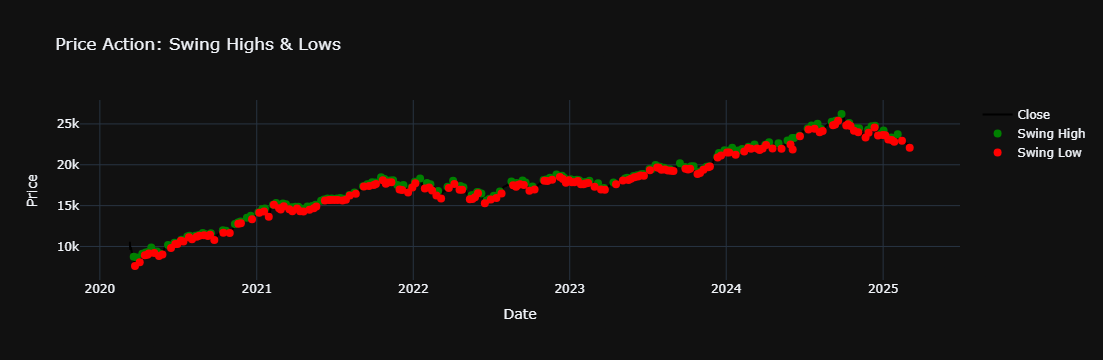

In [3]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go

# Load NIFTY50 data (Replace with actual data file)
df = pd.read_csv("NIFTY50_1d_5y.csv", parse_dates=["Date"], index_col="Date")

# Compute necessary indicators (as before)
df["Close"] = df["Close"]
df["High"] = df["High"]
df["Low"] = df["Low"]

# Use a rolling window to detect local highs and lows
window = 5  # Adjust window size based on timeframe and desired sensitivity
df["swing_high"] = df["Close"][(df["Close"] == df["Close"].rolling(window=window, center=True).max())]
df["swing_low"] = df["Close"][(df["Close"] == df["Close"].rolling(window=window, center=True).min())]

# Plot the price along with detected swing highs and lows
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["Close"], mode="lines", name="Close", line=dict(color='black', width=2)))
fig.add_trace(go.Scatter(x=df.index, y=df["swing_high"], mode="markers", name="Swing High", marker=dict(color='green', size=8)))
fig.add_trace(go.Scatter(x=df.index, y=df["swing_low"], mode="markers", name="Swing Low", marker=dict(color='red', size=8)))

fig.update_layout(title="Price Action: Swing Highs & Lows", xaxis_title="Date", yaxis_title="Price", template="plotly_dark")
fig.show()


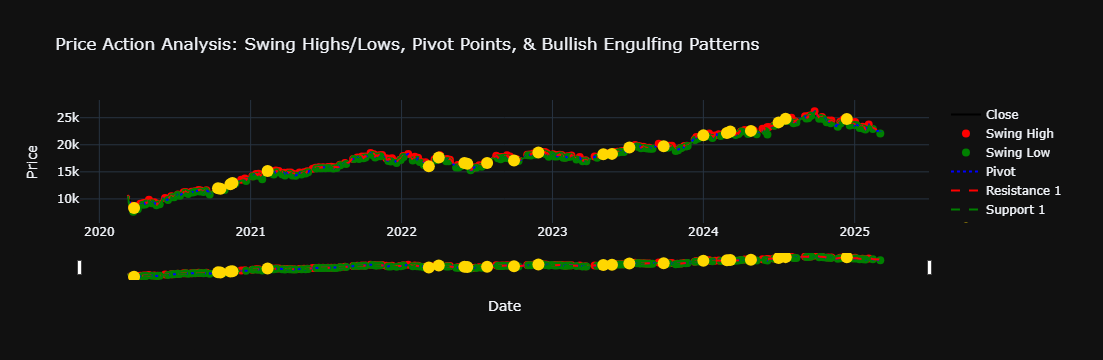

In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load NIFTY50 data (Replace with your actual data file)
df = pd.read_csv("NIFTY50_1d_5y.csv", parse_dates=["Date"], index_col="Date")

# --- 1. Detect Swing Highs and Swing Lows ---
# Using a rolling window to identify local maximums (swing highs) and minimums (swing lows)
window = 5  # Adjust based on desired sensitivity
df["swing_high"] = df["Close"][(df["Close"] == df["Close"].rolling(window=window, center=True).max())]
df["swing_low"] = df["Close"][(df["Close"] == df["Close"].rolling(window=window, center=True).min())]

# --- 2. Calculate Pivot Points (Support/Resistance Levels) ---
# Pivot point formulas (for daily data):
# Pivot (P) = (High + Low + Close) / 3
# Resistance 1 (R1) = 2P - Low, Support 1 (S1) = 2P - High
df["Pivot"] = (df["High"] + df["Low"] + df["Close"]) / 3
df["R1"] = 2 * df["Pivot"] - df["Low"]
df["S1"] = 2 * df["Pivot"] - df["High"]

# --- 3. Candlestick Pattern Recognition: Bullish Engulfing ---
def bullish_engulfing(data):
    """
    Identify bullish engulfing patterns:
    - Previous candle is bearish (Close < Open)
    - Current candle is bullish (Close > Open)
    - Current candle's body fully engulfs the previous candle's body
    """
    pattern = [False]  # First row has no prior candle to compare
    for i in range(1, len(data)):
        prev = data.iloc[i-1]
        curr = data.iloc[i]
        if (prev["Close"] < prev["Open"] and              # Previous candle bearish
            curr["Close"] > curr["Open"] and              # Current candle bullish
            curr["Open"] < prev["Close"] and              # Current open below previous close
            curr["Close"] > prev["Open"]):                # Current close above previous open
            pattern.append(True)
        else:
            pattern.append(False)
    return pattern

df["BullishEngulfing"] = bullish_engulfing(df)

# --- Create the Interactive Chart using Plotly ---
fig = go.Figure()

# Plot the closing price as a line
fig.add_trace(go.Scatter(x=df.index, y=df["Close"],
                         mode="lines", name="Close",
                         line=dict(color="black", width=2)))

# Plot Swing Highs and Swing Lows as markers
fig.add_trace(go.Scatter(x=df.index, y=df["swing_high"],
                         mode="markers", name="Swing High",
                         marker=dict(color="red", size=8)))
fig.add_trace(go.Scatter(x=df.index, y=df["swing_low"],
                         mode="markers", name="Swing Low",
                         marker=dict(color="green", size=8)))

# Plot Pivot, Resistance, and Support lines
fig.add_trace(go.Scatter(x=df.index, y=df["Pivot"],
                         mode="lines", name="Pivot",
                         line=dict(color="blue", dash="dot")))
fig.add_trace(go.Scatter(x=df.index, y=df["R1"],
                         mode="lines", name="Resistance 1",
                         line=dict(color="red", dash="dash")))
fig.add_trace(go.Scatter(x=df.index, y=df["S1"],
                         mode="lines", name="Support 1",
                         line=dict(color="green", dash="dash")))

# Highlight Bullish Engulfing patterns as markers
engulfing_signals = df[df["BullishEngulfing"]]
fig.add_trace(go.Scatter(x=engulfing_signals.index, y=engulfing_signals["Close"],
                         mode="markers", name="Bullish Engulfing",
                         marker=dict(color="gold", size=12)))

# Update layout for better visualization
fig.update_layout(
    title="Price Action Analysis: Swing Highs/Lows, Pivot Points, & Bullish Engulfing Patterns",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_dark",
    hovermode="x unified",
    xaxis_rangeslider_visible=True,
    height=700
)

# Show the plot
fig.show()


In [10]:
df.to_csv('stats.csv')

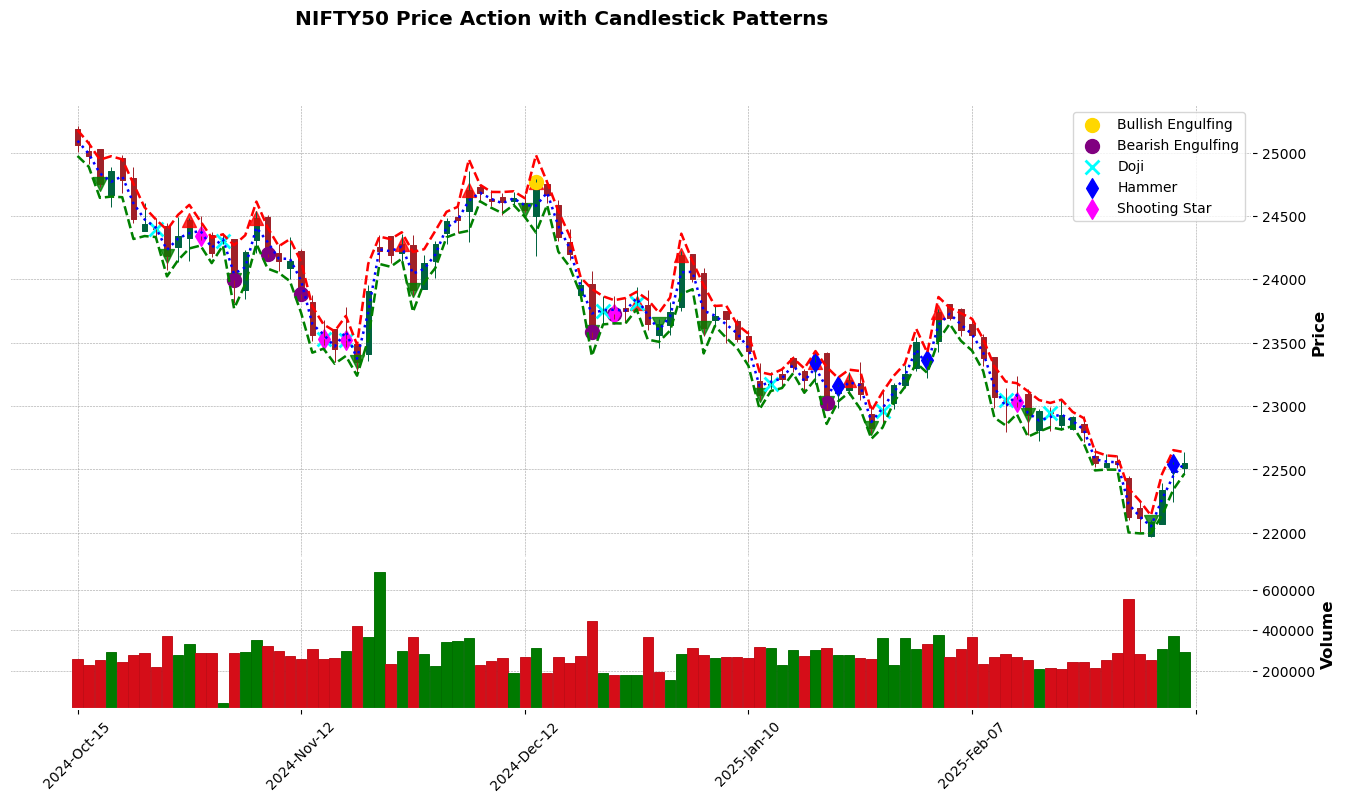

In [4]:
import pandas as pd
import numpy as np
import mplfinance as mpf

# Load NIFTY50 data
df = pd.read_csv("NIFTY50_1d_5y.csv", parse_dates=["Date"], index_col="Date")

df = df.tail(100)
# --- 1. Detect Swing Highs and Swing Lows ---
window = 5  # Adjust for sensitivity
df["Swing_High"] = df["Close"][(df["Close"] == df["Close"].rolling(window=window, center=True).max())]
df["Swing_Low"] = df["Close"][(df["Close"] == df["Close"].rolling(window=window, center=True).min())]

# --- 2. Calculate Pivot Points (Support/Resistance Levels) ---
df["Pivot"] = (df["High"] + df["Low"] + df["Close"]) / 3
df["R1"] = 2 * df["Pivot"] - df["Low"]
df["S1"] = 2 * df["Pivot"] - df["High"]

# --- 3. Candlestick Pattern Recognition ---
def detect_patterns(data):
    bullish_engulfing = []
    bearish_engulfing = []
    doji = []
    hammer = []
    shooting_star = []

    for i in range(1, len(data)):
        prev = data.iloc[i-1]
        curr = data.iloc[i]
        
        # Bullish Engulfing
        if (prev["Close"] < prev["Open"] and  
            curr["Close"] > curr["Open"] and  
            curr["Open"] < prev["Close"] and  
            curr["Close"] > prev["Open"]):  
            bullish_engulfing.append(curr["Close"])
        else:
            bullish_engulfing.append(np.nan)
        
        # Bearish Engulfing
        if (prev["Close"] > prev["Open"] and  
            curr["Close"] < curr["Open"] and  
            curr["Open"] > prev["Close"] and  
            curr["Close"] < prev["Open"]):  
            bearish_engulfing.append(curr["Close"])
        else:
            bearish_engulfing.append(np.nan)

        # Doji (Small body, Open ≈ Close)
        if abs(curr["Open"] - curr["Close"]) <= (curr["High"] - curr["Low"]) * 0.1:
            doji.append(curr["Close"])
        else:
            doji.append(np.nan)

        # Hammer (Small body, long lower shadow)
        if (curr["Close"] > curr["Open"] and  
            (curr["Open"] - curr["Low"]) > 2 * abs(curr["Open"] - curr["Close"]) and  
            (curr["High"] - curr["Close"]) < 0.3 * (curr["High"] - curr["Low"])):
            hammer.append(curr["Close"])
        else:
            hammer.append(np.nan)

        # Shooting Star (Small body, long upper shadow)
        if (curr["Close"] < curr["Open"] and  
            (curr["High"] - curr["Open"]) > 2 * abs(curr["Open"] - curr["Close"]) and  
            (curr["Close"] - curr["Low"]) < 0.3 * (curr["High"] - curr["Low"])):
            shooting_star.append(curr["Close"])
        else:
            shooting_star.append(np.nan)

    # First row should be NaN since there's no previous row for comparison
    bullish_engulfing.insert(0, np.nan)
    bearish_engulfing.insert(0, np.nan)
    doji.insert(0, np.nan)
    hammer.insert(0, np.nan)
    shooting_star.insert(0, np.nan)

    data["Bullish_Engulfing"] = bullish_engulfing
    data["Bearish_Engulfing"] = bearish_engulfing
    data["Doji"] = doji
    data["Hammer"] = hammer
    data["Shooting_Star"] = shooting_star

detect_patterns(df)

# --- 4. Visualization with mplfinance ---
# Custom markers for patterns
apdict = [
    mpf.make_addplot(df["Swing_High"], scatter=True, markersize=100, marker="^", color="red", alpha=0.8),  # Swing High
    mpf.make_addplot(df["Swing_Low"], scatter=True, markersize=100, marker="v", color="green", alpha=0.8),  # Swing Low
    mpf.make_addplot(df["Pivot"], color="blue", linestyle="dotted"),  # Pivot Line
    mpf.make_addplot(df["R1"], color="red", linestyle="dashed"),  # Resistance 1
    mpf.make_addplot(df["S1"], color="green", linestyle="dashed"),  # Support 1
    mpf.make_addplot(df["Bullish_Engulfing"], scatter=True, markersize=100, marker="o", color="gold", label="Bullish Engulfing"),
    mpf.make_addplot(df["Bearish_Engulfing"], scatter=True, markersize=100, marker="o", color="purple", label="Bearish Engulfing"),
    mpf.make_addplot(df["Doji"], scatter=True, markersize=100, marker="x", color="cyan", label="Doji"),
    mpf.make_addplot(df["Hammer"], scatter=True, markersize=100, marker="d", color="blue", label="Hammer"),
    mpf.make_addplot(df["Shooting_Star"], scatter=True, markersize=100, marker="d", color="magenta", label="Shooting Star"),
]

# Create the candlestick chart
mpf.plot(df, type="candle", style="charles",
         title="NIFTY50 Price Action with Candlestick Patterns",
         ylabel="Price",
         volume=True,
         addplot=apdict,
         figscale=1.5,
         figratio=(18,9),
         panel_ratios=(6,2))